In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('https://raw.githubusercontent.com/thomouvic/SENG474/main/data/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Structure

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

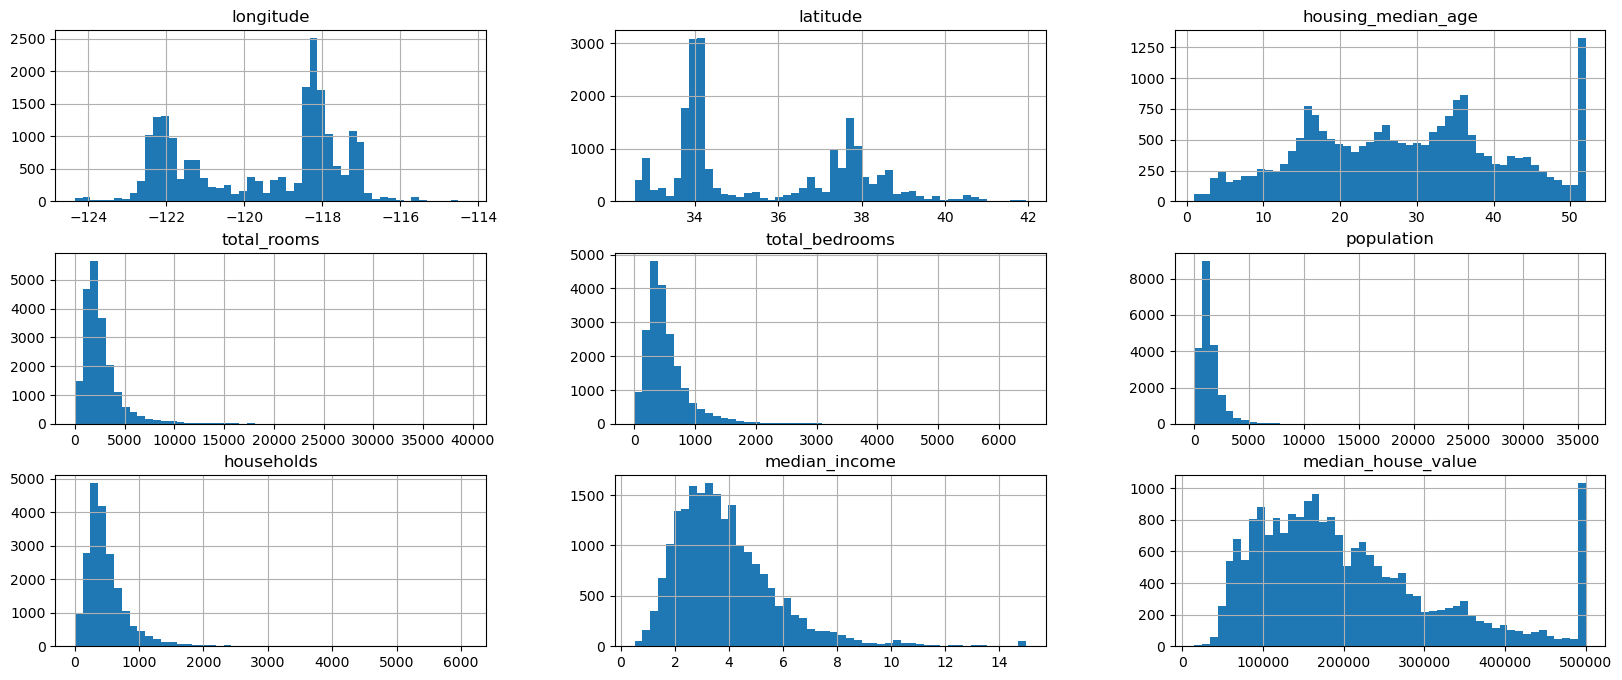

In [6]:
housing.hist(bins=50, figsize=(20,8))

# Create Test Set

In [7]:
# using scikit-learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
len(train_set), len(test_set)

(16512, 4128)

### Income Category Analysis

The following code performs two main operations on the `housing` DataFrame:

1. **Categorization of Income Levels:**
   - Utilizes `pd.cut()` to create a new column `"income_cat"` in the DataFrame.
   - This function segments the `"median_income"` values into five distinct categories based on specified income ranges.
   - The bins are defined as `[0., 1.5, 3.0, 4.5, 6., np.inf]`, grouping incomes into ranges: 0-1.5 (category 1), 1.5-3.0 (category 2), etc., with the last category capturing all incomes above 6.

2. **Visualization of Income Categories:**
   - A bar plot is generated to visualize the distribution of these income categories.
   - `value_counts().sort_index().plot(kind='bar')` creates a bar chart showing the frequency of each income category.
   - This visualization aids in understanding the spread of different income categories within the housing data.


Text(0, 0.5, 'Count')

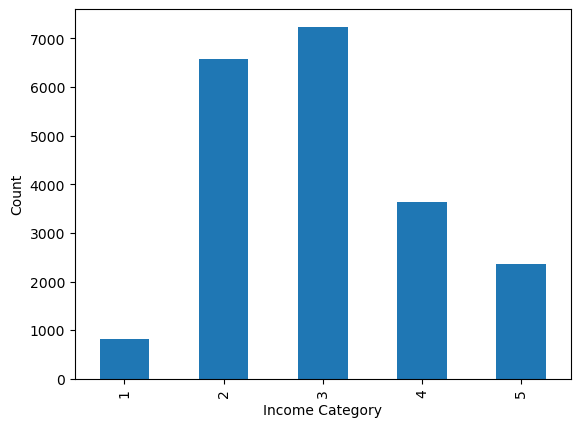

In [8]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Income Category")
plt.ylabel("Count")

In [9]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, 
    random_state=42, 
    stratify=housing["income_cat"])

len(strat_train_set), len(strat_test_set)

(16512, 4128)

In [10]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
print(housing["income_cat"].value_counts() / len(housing))
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print(test_set["income_cat"].value_counts() / len(test_set))

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
income_cat
3    0.345203
2    0.307413
4    0.184109
5    0.120882
1    0.042393
Name: count, dtype: float64


In [12]:
#drop income_cat
strat_train_set = strat_train_set.drop("income_cat", axis=1)
strat_test_set = strat_test_set.drop("income_cat", axis=1)


In [13]:
housing = strat_train_set.copy()

# Explore and Visualize Data

<Axes: xlabel='longitude', ylabel='latitude'>

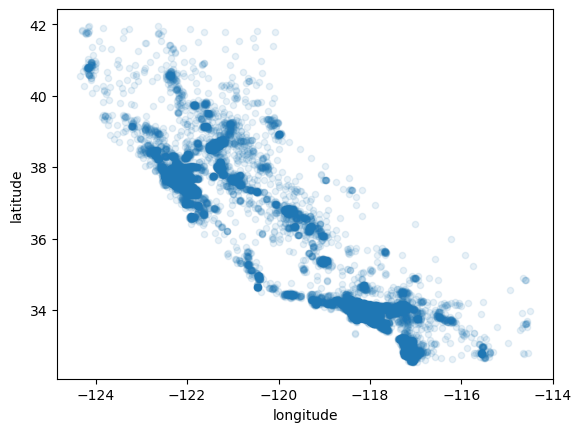

In [14]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

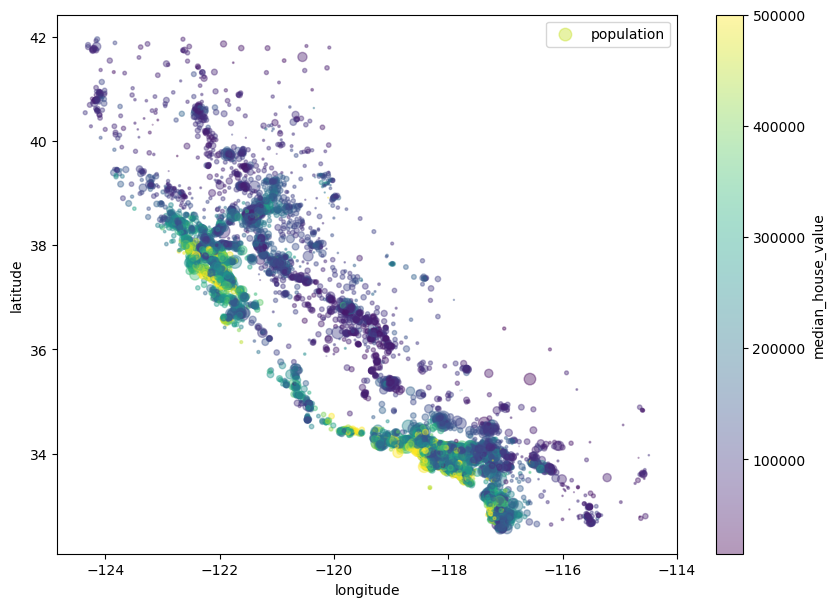

In [15]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
             s=housing["population"]/100, 
             label="population", 
             figsize=(10,7), 
             c="median_house_value", 
             colorbar=True)

In [16]:
# select numerical attributes using pandas and numpy
housing_num = housing.select_dtypes(include=[np.number])
housing_num.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924213,-0.102937,0.044558,0.068210,0.104236,0.054261,-0.016542,-0.050859
latitude,-0.924213,1.000000,0.005692,-0.036753,-0.066391,-0.115677,-0.071604,-0.078137,-0.139584
housing_median_age,-0.102937,0.005692,1.000000,-0.361710,-0.317978,-0.301906,-0.300075,-0.127043,0.102175
total_rooms,0.044558,-0.036753,-0.361710,1.000000,0.930076,0.863967,0.916143,0.197720,0.137455
total_bedrooms,0.068210,-0.066391,-0.317978,0.930076,1.000000,0.886200,0.978822,-0.006038,0.054635
population,0.104236,-0.115677,-0.301906,0.863967,0.886200,1.000000,0.916237,0.004282,-0.020153
households,0.054261,-0.071604,-0.300075,0.916143,0.978822,0.916237,1.000000,0.013637,0.071426
median_income,-0.016542,-0.078137,-0.127043,0.197720,-0.006038,0.004282,0.013637,1.000000,0.688380
median_house_value,-0.050859,-0.139584,0.102175,0.137455,0.054635,-0.020153,0.071426,0.688380,1.000000


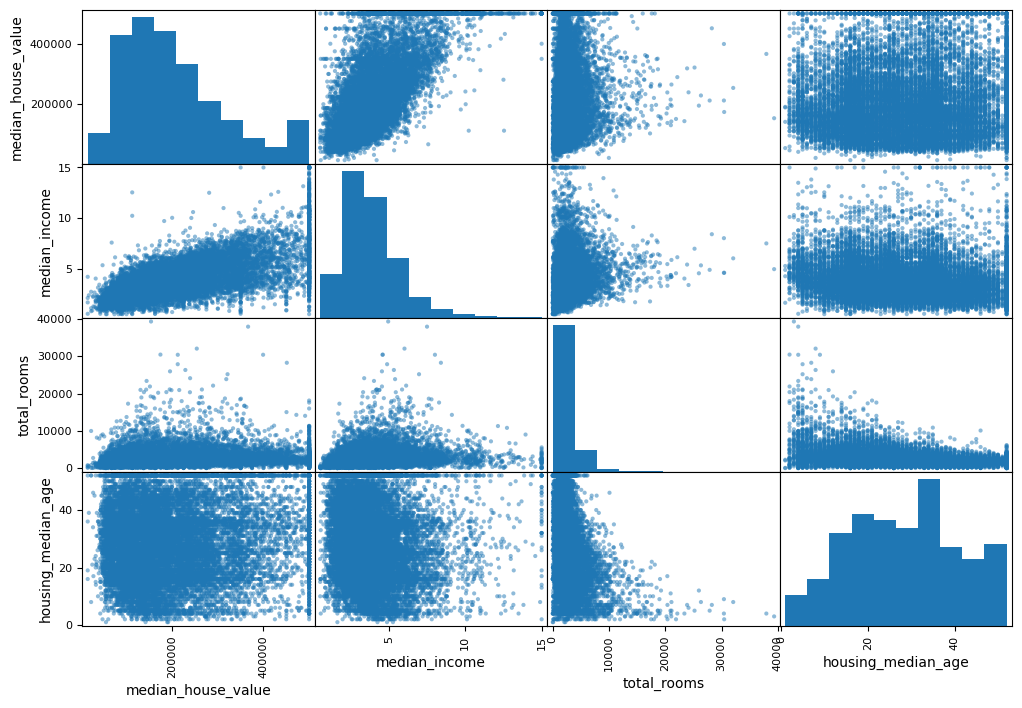

In [17]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
pd.plotting.scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

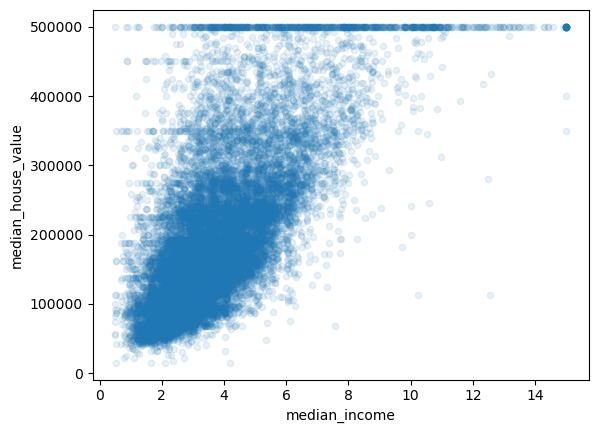

In [18]:
housing.plot(kind="scatter", x="median_income", 
             y="median_house_value", alpha=0.1)

# Attribute Combinations

In [19]:
# experimenting with attribute combinations
housing["rooms_per_house"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_house"]=housing["population"]/housing["households"]

In [20]:
# select numerical attributes using pandas and numpy
housing_num = housing.select_dtypes(include=[np.number])
corr_matrix = housing_num.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688380
rooms_per_house         0.143663
total_rooms             0.137455
housing_median_age      0.102175
households              0.071426
total_bedrooms          0.054635
population             -0.020153
population_per_house   -0.038224
longitude              -0.050859
latitude               -0.139584
bedrooms_ratio         -0.256397
Name: median_house_value, dtype: float64

# Prepare data for ML

In [21]:
# revert to a clean training set
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

housing_test = strat_test_set.drop("median_house_value", axis=1)
housing_labels_test = strat_test_set["median_house_value"].copy()


### Clean the Data

In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [23]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [24]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [25]:
X = imputer.transform(housing_num)
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

### Handling Text and Categorical Attributes

In [26]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [27]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

print(housing_cat_encoded[:10])
print(ordinal_encoder.categories_)

[[3.]
 [0.]
 [1.]
 [1.]
 [4.]
 [1.]
 [0.]
 [3.]
 [0.]
 [0.]]
[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


In [28]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

print(housing_cat_1hot)
print(housing_cat_1hot.toarray())

  (0, 3)	1.0
  (1, 0)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 4)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 3)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 4)	1.0
  (15, 0)	1.0
  (16, 1)	1.0
  (17, 3)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 4)	1.0
  (22, 1)	1.0
  (23, 3)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 0)	1.0
  (16489, 0)	1.0
  (16490, 3)	1.0
  (16491, 1)	1.0
  (16492, 4)	1.0
  (16493, 4)	1.0
  (16494, 1)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 0)	1.0
  (16498, 0)	1.0
  (16499, 4)	1.0
  (16500, 0)	1.0
  (16501, 0)	1.0
  (16502, 0)	1.0
  (16503, 0)	1.0
  (16504, 0)	1.0
  (16505, 0)	1.0
  (16506, 1)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 4)	1.0
  (16510, 0)	1.0
  (16511, 4)	1.0
[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]


In [29]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

### Feature Scaling and Transformation

In [30]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
housing_minmax = min_max_scaler.fit_transform(housing_num)
housing_minmax

array([[0.19574037, 0.55851064, 1.        , ..., 0.09649123, 0.19283181,
        0.11026055],
       [0.60547667, 0.16914894, 0.76470588, ..., 0.04066986, 0.06645511,
        0.38535331],
       [0.24036511, 0.61808511, 0.62745098, ..., 0.03429027, 0.03770767,
        0.1333154 ],
       ...,
       [0.73935091, 0.00425532, 0.23529412, ..., 0.17243283, 0.14168378,
        0.24563109],
       [0.60344828, 0.1606383 , 0.70588235, ..., 0.10563121, 0.15624417,
        0.25141722],
       [0.19675456, 0.54361702, 0.84313725, ..., 0.04165133, 0.03938772,
        0.19195597]])

In [31]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
housing_standard = standard_scaler.fit_transform(housing_num)
housing_standard

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

### Custom Transformers

A `FunctionTransformer` forwards its X arguments to a user-defined function or function object and returns the result of this function.

In [32]:
# import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

# 'fit_tranform' calls 'fit' then 'transform'
log_pop = log_transformer.fit_transform(housing[["population"]])
log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


array([[<Axes: title={'center': 'population'}>]], dtype=object)

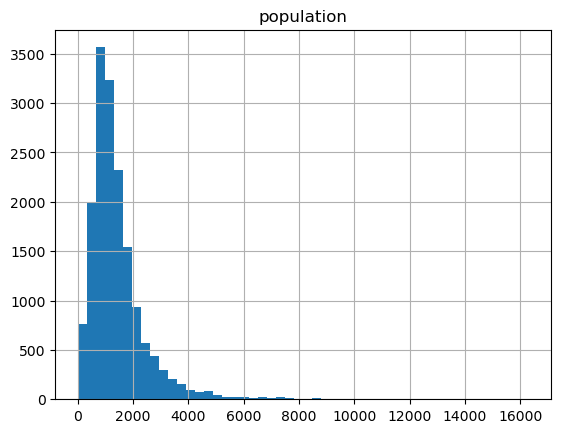

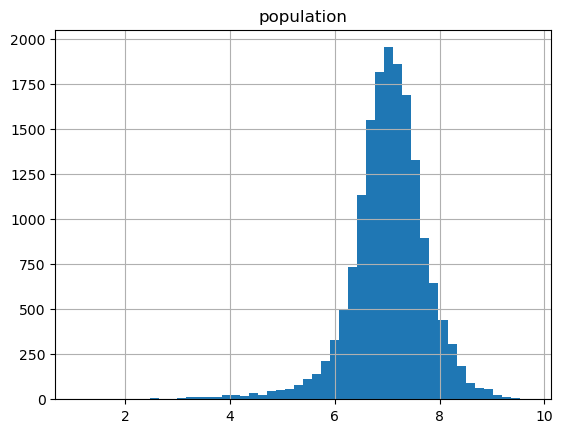

In [33]:
# Compare the histograms of the original and log transformed data
# Note that the log transformation makes the data more normally distributed
pop = housing[["population"]]

pop.hist(bins=50)
log_pop.hist(bins=50)

# Transformation Pipelines

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# extract numerical and categorical attributes
# into separate dataframes
housing_num = housing.select_dtypes(include=[np.number])
housing_cat = housing.select_dtypes(include=['object'])

# obtain the column names of the numerical and categorical attributes
num_attribs = list(housing_num)
cat_attribs = list(housing_cat)

# create a pipeline for numerical attributes
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), 
                             StandardScaler())

# create a pipeline for categorical attributes
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), 
                             OneHotEncoder(handle_unknown='ignore'))

# Combine the numerical and categorical pipelines using 'ColumnTransformer'
# Here, 'ColumnTransformer' takes a list of tuples,
# each tuple contains a name, a pipeline, and a list of columns 
# that the pipeline should be applied to.
# The output matrices of the pipelines are concatenated side-by-side
# into a single feature matrix.
preprocess_pipeline = ColumnTransformer(        
    [('num', num_pipeline, num_attribs), 
     ('cat', cat_pipeline, cat_attribs)])

housing_prepared = preprocess_pipeline.fit_transform(housing)
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

In the above code, the `ColumnTransformer` is casually referred to as a "pipeline" due to its role in preprocessing data by applying different transformations to numerical and categorical columns in parallel. 

Although technically a `ColumnTransformer` is not a `Pipeline` object, this terminology is commonly used in machine learning workflows to describe any sequence of data transformations that prepares data for modeling. The `ColumnTransformer` combines separate pipelines for numerical and categorical data, functioning similarly to a pipeline by streamlining the preprocessing steps into a single, cohesive process.

Additionally, both transformers and pipelines in Scikit-Learn have similar methods (such as `.fit()`, `.transform()`, and `.fit_transform()`), allowing them to be used interchangeably in many contexts. This methodological similarity further blurs the lines between the specific classes, underlining their functional roles in the preprocessing and modeling pipeline rather than the technicalities of their implementation.

In [35]:
# If we want to obtain a dataframe from the output of ColumnTransformer,
# we can use the get_feature_names_out() method to obtain the column names
# of the transformed data, and then create a dataframe using those names.

df_housing_num_tr = pd.DataFrame(housing_prepared, 
                                 columns=preprocess_pipeline.get_feature_names_out())
df_housing_num_tr

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
0,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
1,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
2,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
3,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
4,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041,1.0,0.0,0.0,0.0,0.0
16508,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630,0.0,1.0,0.0,0.0,0.0
16509,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049,0.0,0.0,0.0,0.0,1.0
16510,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396,1.0,0.0,0.0,0.0,0.0


### Putting everything together in a pipeline

In [1]:
#4 total pipelines, pipelines contain transformers
#A pipeline is a way to streamline a lot of the routine processes, by putting together a sequence of data processing steps. In scikit-learn,
# the Pipeline class allows you to assemble several steps that can be cross-validated together while setting different parameters.

#Transformers are components in the pipeline responsible for data transformation. In scikit-learn, transformers 
#are typically used for preprocessing steps such as scaling, encoding categorical variables, or reducing dimensionality.

ratio_pipeline = make_pipeline(
      SimpleImputer(strategy="median"), 
      FunctionTransformer(func=lambda X: X[:, [0]] / X[:, [1]],  #lambda functions
                          feature_names_out=lambda function_transformer, feature_names_in: ["ratio"]), 
                                                                                            #could output more than one attribute
      StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),       
    FunctionTransformer(func=np.log, feature_names_out="one-to-one"),
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

default_num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler())


# The `ColumnTransformer` will utilize the attribute lists associated with 
# each pipeline to create separate dataframes from the input dataframe. 
# Subsequently, it will provide these dataframes as input to the corresponding pipelines.

# Here, rather than picking the numerical and categorical attributes automatically,
# we explicitly specify the attribute lists.

preprocessing = ColumnTransformer(          #used comlumn transformer to put all in columns in order
    [("bedrooms_per_rooms", ratio_pipeline, ["total_bedrooms","total_rooms"]),
     ("rooms_per_house", ratio_pipeline, ["total_rooms","households"]),
     ("people_per_house", ratio_pipeline, ["population","households"]),
     ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population", "households", "median_income"]),
     ("cat", cat_pipeline, ["ocean_proximity"])],           
     
     remainder=default_num_pipeline             #if any numerical attributes left
)

housing_prepared = preprocessing.fit_transform(housing)

print(housing_prepared.shape)
print(preprocessing.get_feature_names_out())

NameError: name 'make_pipeline' is not defined

The names of features are constructed as `<name of transformer or pipeline>__<name of feature>`.

(Recall, transformers and pipelines are often used interchangably)

In `bedrooms_per_rooms__ratio`:

* `bedrooms_per_rooms` is the name of the pipeline that created this feature. The pipeline is instantiated to `ratio_pipeline`.
* `ratio` is the name of the feature that the `ratio_name()` function created. 

In `log__population`:

* `log` is the name of the pipeline that created this feature. The pipeline is instantiated to `log_pipeline`.
* `population` is the name of the feature that `FunctionTransformer(np.log, feature_names_out="one-to-one")` --used in the `log_pipeline`-- creates if a dataframe with a `population` column is provided. This is because we have specified `feature_names_out="one-to-one"`, which means the output feature will have the same name as the input feature. 


In `cat__ocean_proximity_INLAND`:

* `cat` is the name of the pipeline that created this feature. The pipeline is instantiated to `cat_pipeline`. 
* `ocean_proximity_INLAND` is the name of the feature that `OneHotEncoder` --used in the `cat_pipeline`-- creates if a dataframe with a `ocean_proximity` column that contains a value `INLAND` is provided.


In `remainder__longitude`:

* `remainder` is the name of the pipeline that created this feature. The last line in our `ColumnTransformer` creates a pipeline called `remainder` which is instantiated to `default_num_pipeline`.  
* `longitude` is the name of the feature that `SimpleImputer` and `StandardScaler` --used in the pipeline-- creates. These transformers are set to `feature_names_out="one-to-one"` internally.

# Select and Train a Model

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

#look up these transformers and pipelines like simple imputer, fucntiontransformer, standardscalar
#in context of linear regression

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms_per_rooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function <lambda...
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [38]:
# Let's predict for the training set itself

housing_predictions = lin_reg.predict(housing)
housing_predictions

array([260051.36004114, 357897.79846769, 125817.08984353, ...,
       209311.19783036, 295827.28647046, 256921.22105069])

In [39]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
lin_rmse

70630.22169174394

In [40]:
# Let's try a more powerful model
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocess_pipeline, DecisionTreeRegressor())
tree_reg.fit(housing, housing_labels)

housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions, squared=False)
tree_rmse

0.0

An error of 0.0 means the model probably has overfit the data.
Let's try cross-validation. 

The following code randomly splits the training set into 10 non-overlapping
subsets called folds, then it trains and evaluates the model 10 times, 
picking a different fold for evaluation every time and using the
other 9 folds for training. 

The result is an array containing the 10 evaluation scores:

### Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, 
                              housing_labels,scoring="neg_root_mean_squared_error", 
                              cv=10)
tree_rmses

# Scikit-Learn's cross-validation expects a utility function, where higher values are better. 
# Therefore, it uses the negative of RMSE as the scoring function. 
# To obtain the RMSE scores, you must negate the output values.

array([67239.88722976, 67482.38780219, 67016.72827711, 71038.35240527,
       67939.46295292, 69695.94830473, 70906.35139223, 70299.95362038,
       66985.89105119, 66131.21150124])

Now the decision tree doesn’t look as good as it did earlier. In fact, it
seems to perform almost as poorly as the linear regression model!

In [42]:
np.mean(tree_rmses)

68473.61745370182